# IKEA  CASE

By: Stephany Rojas Gerena

### 1. Import libraries 

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### 2. Reading data

In [55]:
df = pd.read_csv('C:/Users/steph/Data Scientist RetailCustomerSales.csv')

df.shape

(537577, 12)

In [56]:
df.head()

,CustomerID,ItemID,Sex,Age,Profession,CityType,YearsInCity,Married,ItemCategory1,ItemCategory2,ItemCategory3,Amount
0,1000001,P00069042,F,0-17,10,A,2,0.0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0.0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0.0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0.0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0.0,8,NaN,NaN,7969


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CustomerID     537577 non-null  int64  
 1   ItemID         537577 non-null  object 
 2   Sex            537577 non-null  object 
 3   Age            537577 non-null  object 
 4   Profession     537577 non-null  int64  
 5   CityType       537577 non-null  object 
 6   YearsInCity    537577 non-null  object 
 7   Married        517407 non-null  float64
 8   ItemCategory1  537577 non-null  int64  
 9   ItemCategory2  370591 non-null  float64
 10  ItemCategory3  164278 non-null  float64
 11  Amount         537577 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 49.2+ MB


We will check the unique values for each variable to check if python is correctly reading the missing values

In [6]:
#Check unique values on each feature

features = df.columns.values
for f in features :
    print(f,': ',df[f].unique())
    print()

CustomerID :  [1000001 1000002 1000003 ... 1004113 1005391 1001529]

ItemID :  ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']

Sex :  ['F' 'M']

Age :  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Profession :  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

CityType :  ['A' 'C' 'B']

YearsInCity :  ['2' '4+' '3' '1' '0']

Married :  [ 0.  1. nan]

ItemCategory1 :  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]

ItemCategory2 :  [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]

ItemCategory3 :  [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]

Amount :  [ 8370 15200  1422 ... 14539 11120 18426]



As we can see, missing values are correctly being read by python since we observe some nan values for some variables.

Now we will check how the variable married looks like before handling the missing values. We will use this to compare later on

<AxesSubplot:xlabel='Married', ylabel='count'>

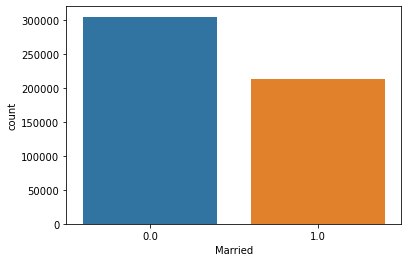

In [57]:
sns.countplot(x=df['Married'])

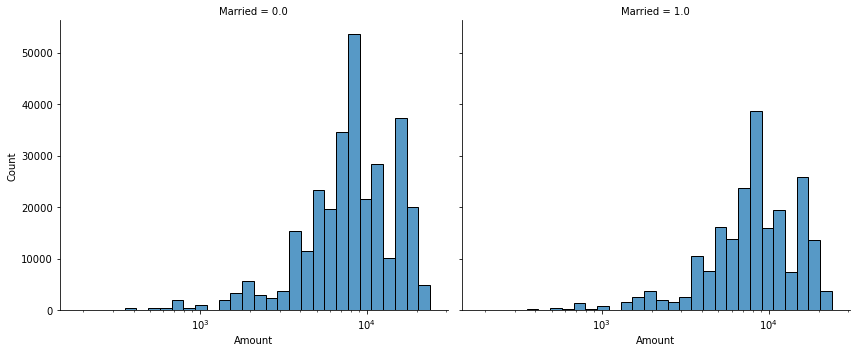

In [8]:
sns.displot(
  x="Amount",
  col="Married",
  kind="hist",
  data=df,  
  aspect=1.2,
  log_scale=10,
  bins=30
)

### 3. Examine missing values

We will examine which variables have missing values and which percentage is missing. First we plot a bar graph that shows the amount of non missing data on each variable

<AxesSubplot:>

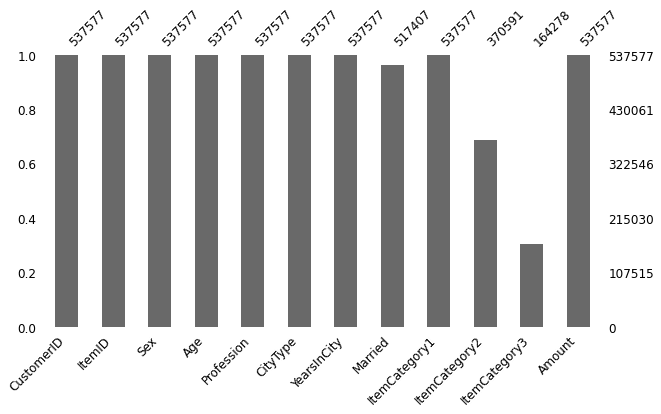

In [21]:
import missingno as msno

msno.bar(df,figsize=(10,5), fontsize=12)

Now we will check the detail of how many missing values are there per variable and the percentage that it represents of the total sample

In [8]:
def missing_values_table(df):
    
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of total data
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Data'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Data', ascending=False).round(1)
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
    
missing_values_table(df)

,Missing Values,% of Total Data
ItemCategory3,373299,69.4
ItemCategory2,166986,31.1
Married,20170,3.8


As we can see in the table and graph, item category 3 is the variable with the highest amount of missing data, and married the one with the lowest. The missing values for item category 3 and 2 can be explained because not all products belong to more than one category.

Now we will check what type of missing data we have by checking the missing values in a matrix plot and correlation plot

<AxesSubplot:>

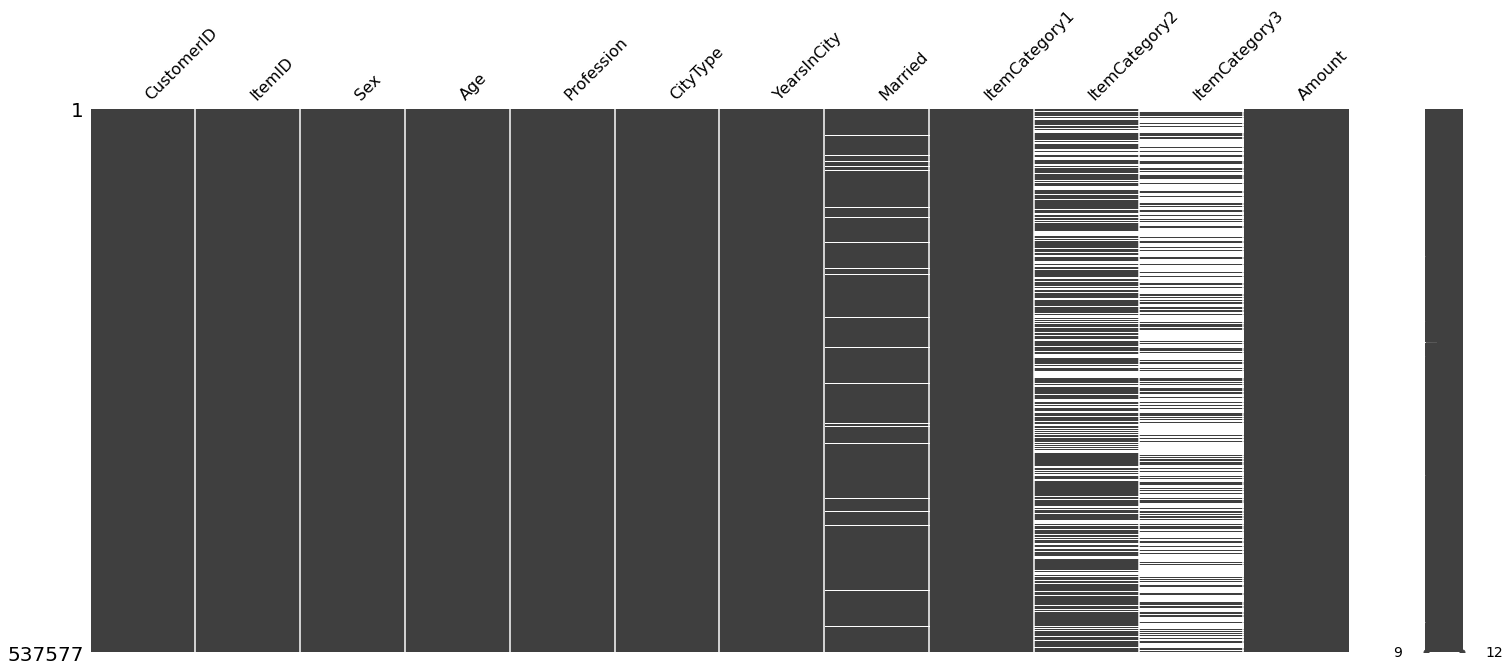

In [27]:
msno.matrix(df)

<AxesSubplot:>

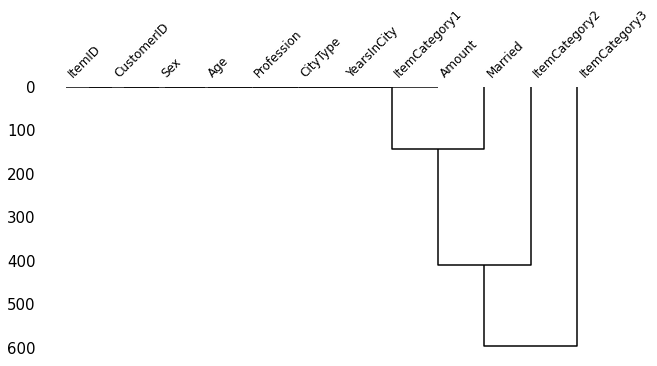

In [24]:
msno.dendrogram(df,figsize=(10,5), fontsize=12)

As we can see in the matrix plot, there is no evidence of a pattern between missing and observed data, also, in the dendogram we can see that the dissimilarity between married and other variables is not high. Therefore, we can say that this is a case of missing at random (MAR) data.

Now we will create a data frame containing only those observations where marital status is observed (not null). This will be our baseline model to evaluate the performance of the missing values imputation

In [41]:
df_married_notnull=df[df['Married'].notnull()]

In [42]:
df_married_notnull.shape

(537577, 13)

In [43]:
df_married_notnull.head()

,CustomerID,ItemID,Sex,Age,Profession,CityType,YearsInCity,Married,ItemCategory1,ItemCategory2,ItemCategory3,Amount,imputed
0,1000001,P00069042,F,0-17,10,A,2,0.0,3,NaN,NaN,8370,False
1,1000001,P00248942,F,0-17,10,A,2,0.0,1,6.0,14.0,15200,False
2,1000001,P00087842,F,0-17,10,A,2,0.0,12,NaN,NaN,1422,False
3,1000001,P00085442,F,0-17,10,A,2,0.0,12,14.0,NaN,1057,False
4,1000002,P00285442,M,55+,16,C,4+,0.0,8,NaN,NaN,7969,False


C:\Users\steph\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

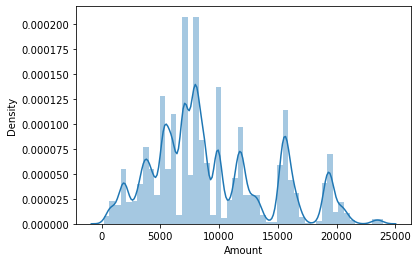

In [44]:
sns.distplot(df_married_notnull["Amount"])

### 4. Handling missing values for marital status

#### 4.1 Univariate - simple imputation

One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension. We will use Simple imputer from sklearn.impute library to do this

In [12]:
from sklearn.impute import SimpleImputer


X = df.drop(['ItemCategory2','ItemCategory3'], axis=1) #not include other missing values

imp = SimpleImputer(strategy="most_frequent", add_indicator=True)
df_imp=imp.fit_transform(X)




In [13]:
#convert to dataframe. Married is in column 7

df_imp=pd.DataFrame(df_imp) 

df_imp.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000001,P00069042,F,0-17,10,A,2,0.0,3,8370,False
1,1000001,P00248942,F,0-17,10,A,2,0.0,1,15200,False
2,1000001,P00087842,F,0-17,10,A,2,0.0,12,1422,False
3,1000001,P00085442,F,0-17,10,A,2,0.0,12,1057,False
4,1000002,P00285442,M,55+,16,C,4+,0.0,8,7969,False


In [24]:
#check the indicator

df_imp[10].unique()
true_count=sum(df_imp[10])
true_count


20170

In [9]:
missing_values_table(df_imp) #check for missing values

,Missing Values,% of Total Data


In [48]:
#Final DF with simple imputation

df2=df.copy(deep=False) #create a duplicate of df

df2["Married"] = df_imp[7] #add the imputation of married
df2["imputed"]=df_imp[10] #add the boolean that says if it was imputed


df2["Married"].isnull().sum() #check no null values in married

0

In [49]:
df2.head()

,CustomerID,ItemID,Sex,Age,Profession,CityType,YearsInCity,Married,ItemCategory1,ItemCategory2,ItemCategory3,Amount,imputed
0,1000001,P00069042,F,0-17,10,A,2,0.0,3,NaN,NaN,8370,False
1,1000001,P00248942,F,0-17,10,A,2,0.0,1,6.0,14.0,15200,False
2,1000001,P00087842,F,0-17,10,A,2,0.0,12,NaN,NaN,1422,False
3,1000001,P00085442,F,0-17,10,A,2,0.0,12,14.0,NaN,1057,False
4,1000002,P00285442,M,55+,16,C,4+,0.0,8,NaN,NaN,7969,False


#### 4.2 k-nearest neighbors imputation

The missing values are replaced by the values of a “Nearest Neighbor”. The method works by finding “k” most similar/nearest
complete cases to the incomplete case where the similarity is measured by a distance, by default, a euclidean distance. The number of neighbors (k) used by default is 5.

In [15]:
#Encoders for categorical variables


dictionary = {"Sex":     {"F": 0, "M": 1},
              "CityType": {"A": 0, "C": 1, "B": 2},
              "YearsInCity" : {"2":2, "4+":4, "3":3, "1":1,"0":0},
              "Age": {"0-17":0, "55+":6, "26-35":2, "46-50":4, "51-55":5, "36-45":3,"18-25":1}
             }

df_encoded=df.replace(dictionary)

df_encoded.head(5)


,CustomerID,ItemID,Sex,Age,Profession,CityType,YearsInCity,Married,ItemCategory1,ItemCategory2,ItemCategory3,Amount
0,1000001,P00069042,0,0,10,0,2,0.0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,0,2,0.0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0.0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,0,2,0.0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,1,4,0.0,8,NaN,NaN,7969


In [16]:
#not include other columns with missing values

X = df_encoded.drop(['ItemID','ItemCategory2','ItemCategory3'], axis=1)

X.head()
X.info()
X.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CustomerID     537577 non-null  int64  
 1   Sex            537577 non-null  int64  
 2   Age            537577 non-null  int64  
 3   Profession     537577 non-null  int64  
 4   CityType       537577 non-null  int64  
 5   YearsInCity    537577 non-null  int64  
 6   Married        517407 non-null  float64
 7   ItemCategory1  537577 non-null  int64  
 8   Amount         537577 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 36.9 MB


(537577, 9)

In [64]:
#KNN

from sklearn.impute import KNNImputer


imputer=KNNImputer(add_indicator=True)
imputer.fit(X)
df_knn=np.round(imputer.transform(X)) #round so that the imputation is categorical

In [65]:
#transform to dataframe

df_knn=pd.DataFrame(df_knn, columns=["CustomerID","Sex","Age","Profession","CityType","YearsInCity","Married","ItemCategory1","Amount","indicator"])

df_knn.head()

#check the indicator

df_knn["indicator"].unique()

df_knn[df_knn["indicator"]==1].count()



CustomerID       20170
Sex              20170
Age              20170
Profession       20170
CityType         20170
YearsInCity      20170
Married          20170
ItemCategory1    20170
Amount           20170
indicator        20170
dtype: int64

In [66]:
#check missing values

missing_values_table(df_knn)

,Missing Values,% of Total Data


In [67]:
#Final DF with KNN imputation

df3=df.copy(deep=False)#create a duplicate of df

df3["Married"] = df_knn["Married"] #add the imputation of married
df3["imputed"]=df_knn["indicator"] #add the categorical that says if it was imputed

df3.head()

,CustomerID,ItemID,Sex,Age,Profession,CityType,YearsInCity,Married,ItemCategory1,ItemCategory2,ItemCategory3,Amount,imputed
0,1000001,P00069042,F,0-17,10,A,2,0.0,3,NaN,NaN,8370,0.0
1,1000001,P00248942,F,0-17,10,A,2,0.0,1,6.0,14.0,15200,0.0
2,1000001,P00087842,F,0-17,10,A,2,0.0,12,NaN,NaN,1422,0.0
3,1000001,P00085442,F,0-17,10,A,2,0.0,12,14.0,NaN,1057,0.0
4,1000002,P00285442,M,55+,16,C,4+,0.0,8,NaN,NaN,7969,0.0


In [68]:
df3["Married"].isnull().sum() #check no null values in married

0

**4.3 How to improve the imputation?**

* KNN can be improved by converting categorical variables in dummies instead of using the encoder. We could use only those dumies/categorical variables to estimate married, and use Hamming distance as the dissimilarity measure for neighbours
* KNN can be improved by choosing the optimal number of neighbors: running multiple times and finding out the error, and choose the number of neighbors that minimize the error, or using cross-validation for tunning parameters
* KNN can be improved by choosing only specific features to impute "Married". This could be achieved by a little feature selection, that could be as simple as measuring correlation (e.g. using chi square test)

### 5. Evaluation of techniques 

We will check how accurate are the suggested models used for handling the missing values. 

**5.1 Comparing plots**

<AxesSubplot:xlabel='Married', ylabel='count'>

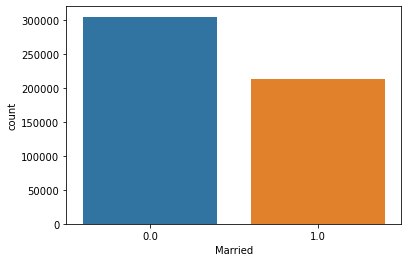

In [61]:
sns.countplot(x=df['Married']) #original

<AxesSubplot:xlabel='Married', ylabel='count'>

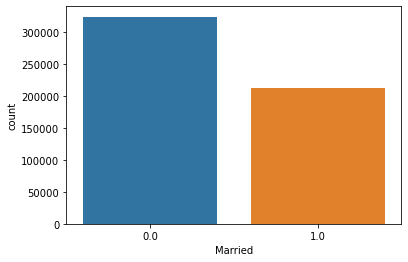

In [62]:
sns.countplot(x=df2['Married']) #simple imputer


<AxesSubplot:xlabel='Married', ylabel='count'>

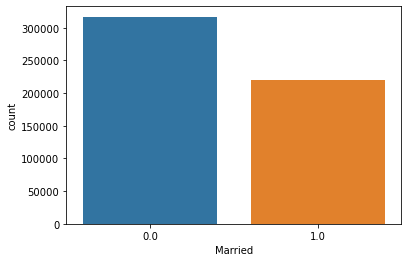

In [69]:
sns.countplot(x=df3['Married']) #knn imputer

**5.2 Fit a linear model to compare**

We will fit a linear model to compare the different imputations used 

In [113]:
import statsmodels.api as sm 

#Build basemodel dropping NA from original df

df_prov = df_encoded[['Sex', 'Profession', 'Married','YearsInCity','Amount']] #define predictor variables


df_cc=df_prov.dropna(how="any") #base model without Nan in married 

X = sm.add_constant(df_cc.iloc[:,:-1])
y = df_cc["Amount"]
lm = sm.OLS(y, X).fit()

print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     482.1
Date:                Thu, 07 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:14:41   Log-Likelihood:            -5.1384e+06
No. Observations:              517407   AIC:                         1.028e+07
Df Residuals:                  517402   BIC:                         1.028e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8708.1706     19.395    448.989      

In [114]:
#Model with simple imputation


dictionary = {
              "YearsInCity" : {"2":2, "4+":4, "3":3, "1":1,"0":0},
             }

df_encoded2=df2.replace(dictionary) #encode df2

df_ss = df_encoded2[['Sex', 'Profession', 'Married','YearsInCity','Amount']] #define predictor variables

df_ss = pd.get_dummies(df_ss, columns=['Sex','Married'], drop_first=True) 

X = sm.add_constant(df_ss.iloc[:,:-1])
y = df_ss["Amount"]
lm_ss = sm.OLS(y, X).fit()


print(lm_ss.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.857e+34
Date:                Thu, 07 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:14:47   Log-Likelihood:             1.2954e+07
No. Observations:              537577   AIC:                        -2.591e+07
Df Residuals:                  537572   BIC:                        -2.591e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.595e-12    3.6e-14    -99.940      

In [115]:
#Model with knn


dictionary = {
              "YearsInCity" : {"2":2, "4+":4, "3":3, "1":1,"0":0},
             }

df_encoded3=df3.replace(dictionary) #encode df3

df_kk = df_encoded3[['Sex', 'Profession', 'Married','YearsInCity','Amount']] #define predictor variables

df_kk = pd.get_dummies(df_kk, columns=['Sex','Married'], drop_first=True) 

X = sm.add_constant(df_kk.iloc[:,:-1])
y = df_kk["Amount"]
lm_kk = sm.OLS(y, X).fit()

print(lm_kk.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.857e+34
Date:                Thu, 07 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:14:53   Log-Likelihood:             1.2954e+07
No. Observations:              537577   AIC:                        -2.591e+07
Df Residuals:                  537572   BIC:                        -2.591e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.595e-12    3.6e-14    -99.940      

As we can see R-squuared won't be very useful to compare, since is suspiciously high for both imputation methods. This can be due to multicollinearity problems. Instead, we will use AIC to compare model's performance

In [116]:
print(pd.DataFrame({"Original":lm.aic,"Simple imputer":lm_ss.aic,"Knn imputer":lm_kk.aic},index=['AIC']))

         Original  Simple imputer   Knn imputer
AIC  1.027684e+07   -2.590861e+07 -2.590861e+07


Since the imputation models have lower AIC value, they are better fitting models compared to the one of missing values. We will choose KNN imputer as our final outcome

### 6. Creating the output

In [120]:
# Chossing only rows where imputation was made

df_final=df3[df3["imputed"]==1]

df_final.shape

(20170, 13)

In [125]:
#drop imputation index

df_final.drop("imputed", axis=1)


,CustomerID,ItemID,Sex,Age,Profession,CityType,YearsInCity,Married,ItemCategory1,ItemCategory2,ItemCategory3,Amount
56,1000015,P00334242,M,26-35,7,A,1,1.0,1,8.0,NaN,19653
57,1000015,P00247542,M,26-35,7,A,1,0.0,8,16.0,NaN,5958
58,1000015,P00338442,M,26-35,7,A,1,1.0,1,16.0,NaN,11415
59,1000015,P00275142,M,26-35,7,A,1,1.0,5,8.0,NaN,5380
60,1000015,P00333042,M,26-35,7,A,1,0.0,5,8.0,NaN,3594
...,...,...,...,...,...,...,...,...,...,...,...,...
537269,1004687,P00207842,M,36-45,14,C,0,1.0,13,16.0,NaN,962
537270,1004687,P00114342,M,36-45,14,C,0,0.0,1,8.0,17.0,19575
537545,1004733,P00144042,M,18-25,18,C,1,1.0,2,3.0,4.0,9687
537546,1004733,P00070042,M,18-25,18,C,1,0.0,1,2.0,16.0,15515


In [126]:
# Save this data as csv

df_final.to_csv('IKEA_case.csv',index=False)

In [117]:
df3["imputed"].unique()

array([0., 1.])

### 7. Broader use of the dataset 

The dataset can be used to predict sales using machine learning algorithms. It means, using Amount as an outcome variable and using the other variables as features for the model. Doing this, we can also answer some questions:

* Customer segmentation to predict if a customer will purchase or not depending on certain characteristics

* What kind of customer spend the highest amount of money

* Return rate of customers: predict if a customer with certain characteristics will buy again

* Which item category should ikea focus on because it will bring the most sales